<a href="https://colab.research.google.com/github/sheeba2/TSF_for_GRIP/blob/main/TSF_TASK_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


**EXPLORATORY DATA ANALYSIS**

In [5]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [6]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [7]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**DISTRIBUTION**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


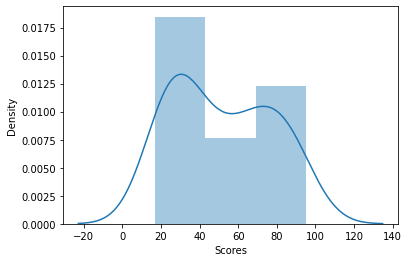

In [10]:
sns.distplot(df['Scores'])
plt.show()

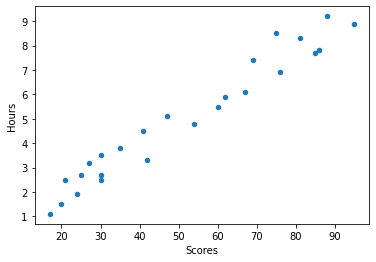

In [12]:
df.plot(kind='scatter',x='Scores',y='Hours')
plt.show()

In [14]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


**LINEAR REGRESSION**

In [15]:
x=df.iloc[:,:-1].values
y=df.iloc[:,1].values

In [20]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=50)
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

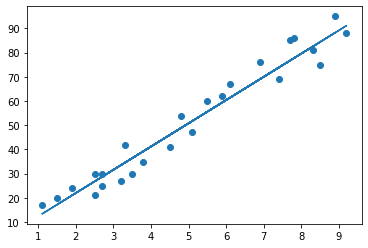

In [24]:

m=reg.coef_
c=reg.intercept_
line=m*x+c
plt.scatter(x,y)
plt.plot(x,line)
plt.show()

In [25]:
y_pred=reg.predict(X_test)

In [26]:
actual_predicted=pd.DataFrame({'Target':y_test,'Predicted':y_pred})
actual_predicted

,Target,Predicted
0,95,88.211394
1,30,28.718453
2,76,69.020122
3,35,39.273652
4,17,13.365436


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


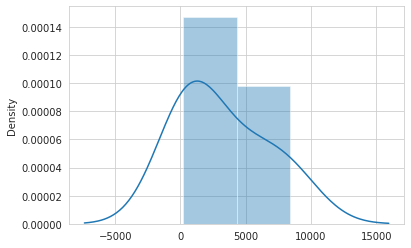

In [30]:
sns.set_style('whitegrid')
sns.distplot(np.array(y_test*y_pred))
plt.show()

**Small testing**

In [32]:
h=9.25
s=reg.predict([[h]])
print('If student studies for {} hours per day he or she will get {}  % in exam'.format(h,s))

If student studies for 9.25 hours per day he or she will get [91.56986604]  % in exam


**MODEL EVALUATION**

In [33]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('R2 score:',r2_score(y_test,y_pred))

Mean Absolute Error: 4.5916495300630285
R2 score: 0.971014141329942
